In [258]:
import matplotlib.pyplot as plt
import numpy as np
import time as t
import timeit
import random
from prettytable import PrettyTable
from collections import deque

In [259]:
class Graph:
    def __init__(self, root):
        self.adj = {}
        self.root = root
        self.vertices = set()

    def add_edge(self, u, v):
        if u not in self.adj:
            self.adj[u] = []
        if v not in self.adj:
            self.adj[v] = []
        self.adj[u].append(v)
        self.adj[v].append(u)
        self.vertices.add(u)
        self.vertices.add(v)

In [260]:
def bfs(G: Graph, target: int) -> int:
    queue = deque()
    queue.append(G.root)
    visited = {v: False for v in G.vertices}
    
    while queue:
        node = queue.popleft()
        if node == target:
            return node
        visited[node] = True
        for neighbor in G.adj[node]:
            if visited[neighbor] == False:
                queue.append(neighbor)
    return None

In [261]:
def dfs(G: Graph, node: int, target: int, visited: dict) -> int:
    if node == target:
        return node
    visited[node] = True
    for neighbor in G.adj[node]:
        if visited[neighbor] == False:
            result = dfs(G, neighbor, target, visited)
            if result is not None:
                return result
    return None

In [262]:
G_bal = Graph(1)

with open("edges_graph_bal.txt", 'r') as file:
    for line in file:
        newline = line.split(', ')
        pairNodes = []
        for token in newline:
            pairNodes.append(token.split('\n')[0])
        G_bal.add_edge(int(pairNodes[0]), int(pairNodes[1]))

In [263]:
G_bal.adj[7]

[3, 14, 15]

In [264]:
G_unbal = Graph(1)

with open("edges_graph_unbal.txt", 'r') as file:
    for line in file:
        newline = line.split(', ')
        pairNodes = []
        for token in newline:
            pairNodes.append(token.split('\n')[0])
        G_unbal.add_edge(int(pairNodes[0]), int(pairNodes[1]))

In [265]:
G_unbal.adj[4]

[2, 8]

In [266]:
print(bfs(G_bal, 12))
print(dfs(G_bal, G_bal.root, 0, {v: False for v in G_bal.vertices}))

12
None


In [267]:
nodes_to_find = [
    1, 2, 3, 4, 5, 6, 7, 8, 
    10, 11, 12, 13, 14, 15, 
    16, 17, 20, 21, 22, 23, 
    24, 25, 28, 29, 30, 31
]
random.shuffle(nodes_to_find)
nodes_to_find

[2,
 29,
 17,
 8,
 20,
 25,
 3,
 1,
 24,
 28,
 15,
 7,
 6,
 4,
 23,
 5,
 21,
 16,
 30,
 10,
 14,
 11,
 22,
 31,
 13,
 12]

In [268]:
avg_time_bal_dfs = []
avg_time_bal_bfs = []
cumulative_time_bal_dfs = []
cumulative_time_bal_bfs = []

In [269]:
for k in range(1, len(nodes_to_find) + 1):
    exec_time_dfs = 0
    exec_time_bfs = 0
    for node in nodes_to_find[:k]:
        exec_time_dfs += timeit.timeit(lambda: dfs(G_bal, G_bal.root, node, {v: False for v in G_bal.vertices}), number=1)
        exec_time_bfs += timeit.timeit(lambda: bfs(G_bal, node), number = 1)
    cumulative_time_bal_dfs.append(exec_time_dfs)
    cumulative_time_bal_bfs.append(exec_time_bfs)
    avg_time_bal_dfs.append(exec_time_dfs/k)
    avg_time_bal_bfs.append(exec_time_bfs/k)

In [270]:
len(avg_time_bal_dfs)

26

In [271]:
table = PrettyTable()

nr_vertices = [i for i in range(1, len(nodes_to_find) + 1)]
table.field_names = ["Nr.vertices"] + nr_vertices[::2]
table.add_row(["Avg.time, s (1e-5)"] + [round(x * 10**5, 3) for x in avg_time_bal_dfs[::2]])
table.add_row(["Cum.time, s (1e-5)"] + [round(x * 10**5, 3) for x in cumulative_time_bal_dfs[::2]])
table

Nr.vertices,1,3,5,7,9,11,13,15,17,19,21,23,25
"Avg.time, s (1e-5)",0.75,0.693,0.62,0.701,0.66,0.787,0.768,0.747,0.724,0.774,0.698,0.679,0.751
"Cum.time, s (1e-5)",0.75,2.08,3.1,4.91,5.94,8.66,9.99,11.2,12.31,14.71,14.65,15.61,18.77


In [272]:
table = PrettyTable()

nr_vertices = [i for i in range(1, len(nodes_to_find) + 1)]
table.field_names = ["Nr.vertices"] + nr_vertices[::2]
table.add_row(["Avg.time, s (1e-5)"] + [round(x * 10**5, 3) for x in avg_time_bal_bfs[::2]])
table.add_row(["Cum.time, s (1e-5)"] + [round(x * 10**5, 3) for x in cumulative_time_bal_bfs[::2]])
table

Nr.vertices,1,3,5,7,9,11,13,15,17,19,21,23,25
"Avg.time, s (1e-5)",0.7,0.88,0.838,0.804,0.91,0.801,0.768,0.761,0.736,0.758,0.708,0.722,0.737
"Cum.time, s (1e-5)",0.7,2.64,4.19,5.63,8.19,8.81,9.98,11.42,12.52,14.4,14.86,16.61,18.42


Text(0.5, 1.0, 'Average search time, balanced graph')

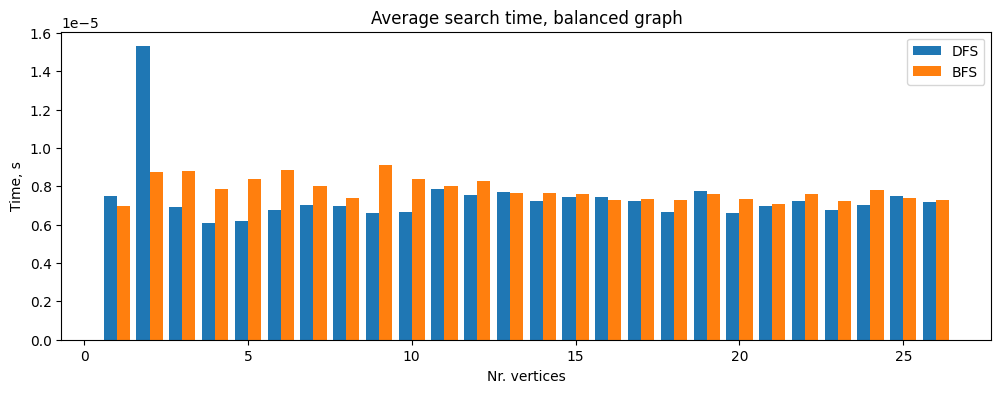

In [273]:
x = np.array([i for i in range(1, len(nodes_to_find) + 1)])
width = 0.40

plt.figure(figsize=(12,4))

plt.bar(x-0.2, avg_time_bal_dfs, width)
plt.bar(x+0.2, avg_time_bal_bfs, width)

plt.xlabel("Nr. vertices")
plt.ylabel("Time, s")
plt.legend(["DFS", "BFS"])
plt.title("Average search time, balanced graph")

Text(0.5, 1.0, 'Cumulative search time, balanced graph')

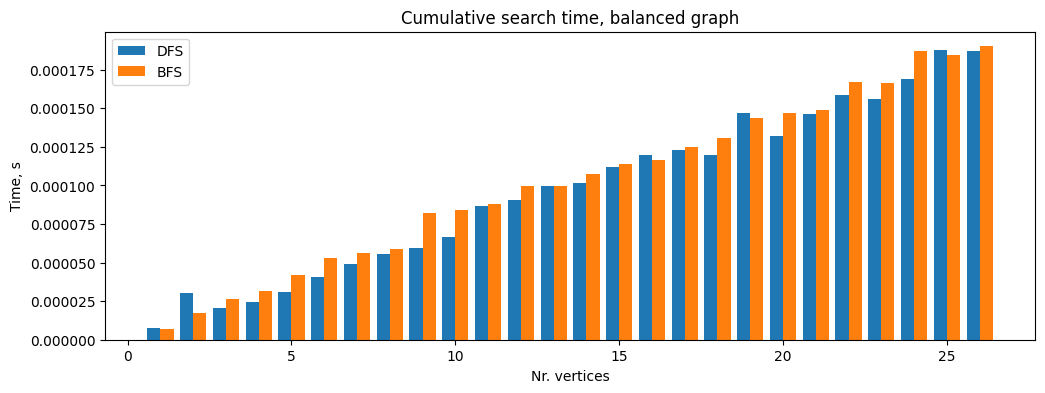

In [274]:
x = np.array([i for i in range(1, len(nodes_to_find) + 1)])
width = 0.40

plt.figure(figsize=(12,4))

plt.bar(x-0.2, cumulative_time_bal_dfs, width)
plt.bar(x+0.2, cumulative_time_bal_bfs, width)

plt.xlabel("Nr. vertices")
plt.ylabel("Time, s")
plt.legend(["DFS", "BFS"])
plt.title("Cumulative search time, balanced graph")

In [275]:
avg_time_unbal_dfs = []
avg_time_unbal_bfs = []
cumulative_time_unbal_dfs = []
cumulative_time_unbal_bfs = []

In [276]:
for k in range(1, len(nodes_to_find) + 1):
    exec_time_dfs = 0
    exec_time_bfs = 0
    for node in nodes_to_find[:k]:
        exec_time_dfs += timeit.timeit(lambda: dfs(G_unbal, G_unbal.root, node, {v: False for v in G_unbal.vertices}), number=1)
        exec_time_bfs += timeit.timeit(lambda: bfs(G_unbal, node), number = 1)
    cumulative_time_unbal_dfs.append(exec_time_dfs)
    cumulative_time_unbal_bfs.append(exec_time_bfs)
    avg_time_unbal_dfs.append(exec_time_dfs/k)
    avg_time_unbal_bfs.append(exec_time_bfs/k)

Text(0.5, 1.0, 'Average search time, unbalanced graph')

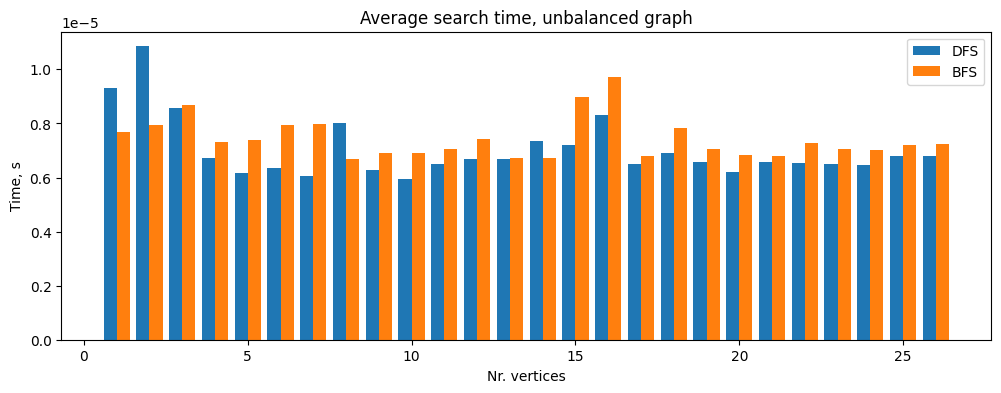

In [277]:
x = np.array([i for i in range(1, len(nodes_to_find) + 1)])
width = 0.40

plt.figure(figsize=(12,4))

plt.bar(x-0.2, avg_time_unbal_dfs, width)
plt.bar(x+0.2, avg_time_unbal_bfs, width)

plt.xlabel("Nr. vertices")
plt.ylabel("Time, s")
plt.legend(["DFS", "BFS"])
plt.title("Average search time, unbalanced graph")

Text(0.5, 1.0, 'Cumulative search time, unbalanced graph')

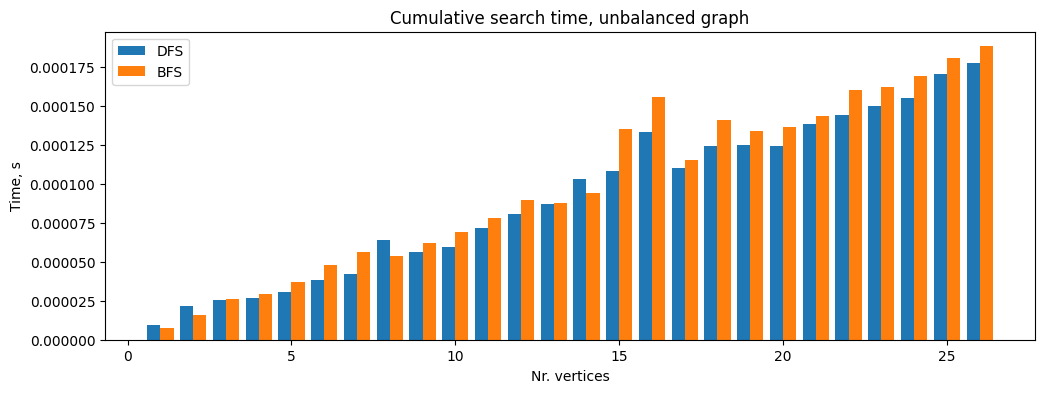

In [278]:
x = np.array([i for i in range(1, len(nodes_to_find) + 1)])
width = 0.40

plt.figure(figsize=(12,4))

plt.bar(x-0.2, cumulative_time_unbal_dfs, width)
plt.bar(x+0.2, cumulative_time_unbal_bfs, width)

plt.xlabel("Nr. vertices")
plt.ylabel("Time, s")
plt.legend(["DFS", "BFS"])
plt.title("Cumulative search time, unbalanced graph")

In [279]:
table = PrettyTable()

nr_vertices = [i for i in range(1, len(nodes_to_find) + 1)]
table.field_names = ["Nr.vertices"] + nr_vertices[::2]
table.add_row(["Avg.time, s (1e-5)"] + [round(x * 10**5, 3) for x in avg_time_unbal_dfs[::2]])
table.add_row(["Cum.time, s (1e-5)"] + [round(x * 10**5, 3) for x in cumulative_time_unbal_dfs[::2]])
table

Nr.vertices,1,3,5,7,9,11,13,15,17,19,21,23,25
"Avg.time, s (1e-5)",0.93,0.857,0.616,0.606,0.627,0.651,0.668,0.722,0.648,0.656,0.659,0.651,0.681
"Cum.time, s (1e-5)",0.93,2.57,3.08,4.24,5.64,7.16,8.69,10.83,11.02,12.46,13.83,14.98,17.02


In [280]:
table = PrettyTable()

nr_vertices = [i for i in range(1, len(nodes_to_find) + 1)]
table.field_names = ["Nr.vertices"] + nr_vertices[::2]
table.add_row(["Avg.time, s (1e-5)"] + [round(x * 10**5, 3) for x in avg_time_unbal_bfs[::2]])
table.add_row(["Cum.time, s (1e-5)"] + [round(x * 10**5, 3) for x in cumulative_time_unbal_bfs[::2]])
table

Nr.vertices,1,3,5,7,9,11,13,15,17,19,21,23,25
"Avg.time, s (1e-5)",0.77,0.867,0.738,0.799,0.689,0.706,0.672,0.899,0.678,0.705,0.681,0.704,0.722
"Cum.time, s (1e-5)",0.77,2.6,3.69,5.59,6.2,7.77,8.74,13.49,11.53,13.39,14.3,16.19,18.04
